# Pneumonia Detection Using VGG
## CS319: Computer Vision
### Fall 2023, AUA
### Mane Davtyan

# Objective

## What is Pneumonia?
Pneumonia is a respiratory infection that inflames the air sacs in one or both lungs. It can be caused by various pathogens, including bacteria, viruses, and fungi. Common symptoms include cough, fever, and difficulty breathing. Early detection of pneumonia is crucial for timely and effective medical intervention.

## Idea

The primary objective of this project is to implement and train a deep learning model for the detection of pneumonia from chest X-ray images. The model, a simplified version of the VGG16 architecture named SimpleVGG16, is trained on a provided dataset containing images of individuals with and without pneumonia.

## Visual Understanding 
Let's see what kind of images the project is dealing with.

*spoiler : 224x224 images containing 3 color channels

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to your dataset
dataset_path = "./data/train"

# Get a few images from NORMAL and PNEUMONIA folders
normal_images_path = os.path.join(dataset_path, "NORMAL")
pneumonia_images_path = os.path.join(dataset_path, "PNEUMONIA")

normal_images = [os.path.join(normal_images_path, img) for img in os.listdir(normal_images_path)[:3]]
pneumonia_images = [os.path.join(pneumonia_images_path, img) for img in os.listdir(pneumonia_images_path)[:3]]

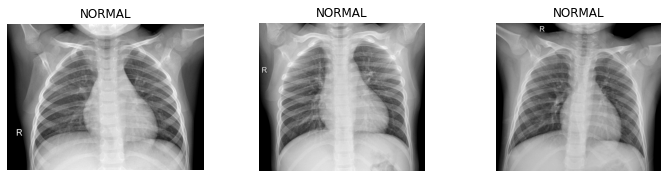

In [37]:
# NORMAL
plt.figure(figsize=(12, 6))
for i, img_path in enumerate(normal_images):
    plt.subplot(2, 3, i + 1)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title("NORMAL")
    plt.axis('off')

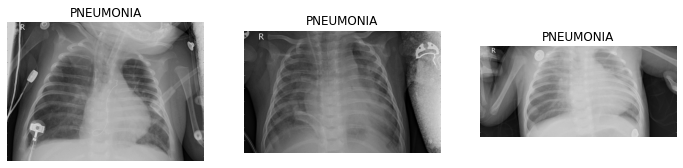

In [39]:
# PNEUMONIA
plt.figure(figsize=(12, 6))
for i, img_path in enumerate(pneumonia_images):
    plt.subplot(2, 3, i + 4)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title("PNEUMONIA")
    plt.axis('off')

plt.show()


# Project Process

1. **Dataset:** The dataset consists of chest X-ray images categorized into classes: "NORMAL" (no pneumonia) and "PNEUMONIA" (pneumonia present).

2. **Model Architecture:** The `SimpleVGG16` model is designed to analyze and classify chest X-ray images. It is implemented from scratch and trained on the provided dataset.

3. **Training:** The training script (`train.py`) allows users to train the model on their dataset, specifying the dataset path, output checkpoint path, and hyperparameters.

4. **Inference:** The inference script (`inference.py`) enables the classification of a single image using the trained model, providing predictions and probabilities.

## Why SimpleVGG16 and what is it?

The answer is sad, but easy. Usual VGG16 was too heavy to train on a CPU, thus SimpleVGG16 came in handy.  :)

## SimpleVGG16 Architecture

| Layer             | Operation                                  |
|-------------------|--------------------------------------------|
| Input             | 3x244x244 (RGB image)                      |
| **Convolution 3x3**| 64 filters, ReLU activation                |
| **MaxPool 2x2**    |                                            |
| **Convolution 3x3**| 128 filters, ReLU activation               |
| **MaxPool 2x2**    |                                            |
| **Convolution 3x3**| 256 filters, ReLU activation               |
| **MaxPool 2x2**    |                                            |
| **Convolution 3x3**| 512 filters, ReLU activation               |
| **MaxPool 2x2**    |                                            |
| **Convolution 3x3**| 512 filters, ReLU activation               |
| **MaxPool 2x2**    |                                            |
| **Fully Connected**| 4096 neurons, ReLU activation              |
| **Fully Connected**| 4096 neurons, ReLU activation              |
| **Fully Connected**| 1 neuron, for binary classification        |
| **Output**        | 1x1 (Binary classification output)          |

After defining the model, it is time to train it. Very ironically, this VGG16 modification was trained over **16 epochs**, and saved in `results` folder, for later usage.  The results of train.py are `simple_vgg16.pth` and `simple_vgg16_loss_accuracy.txt`, which will later be used for results visualisation.


# Results

I have divided the discussion of results into two parts. 

- **Model Accuracy**

- **inference.py results**

In [16]:
import pandas as pd
import re

file_path = "./result/simple_vgg16_loss_accuracy.txt"

epochs = []
losses = []
accuracies = []

# Read data from the file
with open(file_path, 'r') as file:
    for line in file:
        # Use regular expression to extract values
        match = re.match(r'Epoch (\d+), Loss: ([\d.]+), Accuracy: ([\d.]+)', line)
        if match:
            epoch, loss, accuracy = map(float, match.groups())
            epochs.append(epoch)
            losses.append(loss)
            accuracies.append(accuracy)

# Create a DataFrame
results = pd.DataFrame({'Epoch': epochs, 'Loss': losses, 'Accuracy': accuracies})
results["Epoch"] = results["Epoch"].astype("str")

### Model after 16 epochs of training

In [44]:
results

,Epoch,Loss,Accuracy
0,1.0,0.775847,0.489650
1,2.0,0.692693,0.489650
2,3.0,0.639089,0.557325
3,4.0,0.428046,0.800955
4,5.0,0.385369,0.815287
5,6.0,0.304989,0.842357
6,7.0,0.229808,0.897293
7,8.0,0.214001,0.909236
8,9.0,0.176907,0.925159
9,10.0,0.166040,0.933917


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


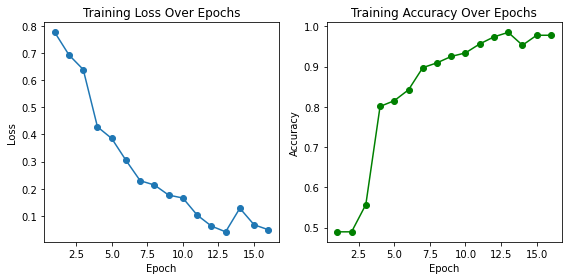

In [42]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Loss'], marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Accuracy'], marker='o', color='green')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.tight_layout()

## inference.py performance
This part of the project is used for testing the model on single image. During the project process, I have tested it on a few different pictures, and for each of them, saved the Probability of having Pneumonia. Just like this:

**Class 0 -> NORMAL** (healthy results)

**Class 1 -> PNEUMONIA** (bacteria or a virus detected)

- Predicted Class: 0, Probability: 0.0341
- Predicted Class: 1, Probability: 0.9709
- Predicted Class: 1, Probability: 0.9403
- Predicted Class: 0, Probability: 0.0734


All the tested results are in result folder. You can test on your own image if you are interested!



You can check more in the project repository. https://github.com/ManeDavtyan/PneumoniaDetection 

# Thank You